In [1]:
using Symbolics
using Latexify
using LinearAlgebra
using NLsolve

In [2]:
debug = true;
const D = 4
include("flux-and-jacobian-functions.jl")
include("inversion.jl")
include("flux-functions.jl")
include("initial-data.jl")

create_initial_data (generic function with 1 method)

In [4]:
N = 1000
M = 1
N_Fields = 14
χ1_num = 0.0
χ2_num = 1.0

test_sol = ones(N,M,2*N_Fields);

Lx = 100.0
Ly = 0.0
lengthpars = (Lx, Ly, N, M)

g_ab_mink = Diagonal([-1.0,1.0,1.0,1.0])
gᵃᵇ_mink = Diagonal([-1.0,1.0,1.0,1.0])

auxvectors = [zeros(4),zeros(4),zeros(4),zeros(4)]
auxmatrices = [zeros(4,4), zeros(4,4), zeros(4,4)]

aux_residual = zeros(14)
aux_jacobian = zeros(14,14)

p = (χ1_num, χ2_num, g_ab_mink, gᵃᵇ_mink, auxvectors, auxmatrices)

par = (lengthpars, p)

((100.0, 0.0, 1000, 1), (0.0, 1.0, [-1.0 0.0 0.0 0.0; 0.0 1.0 0.0 0.0; 0.0 0.0 1.0 0.0; 0.0 0.0 0.0 1.0], [-1.0 0.0 0.0 0.0; 0.0 1.0 0.0 0.0; 0.0 0.0 1.0 0.0; 0.0 0.0 0.0 1.0], [[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0]], [[0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0], [0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0], [0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0]]))

In [5]:
create_initial_data(test_sol, par)

closing initialization function...


In [6]:
using Plots

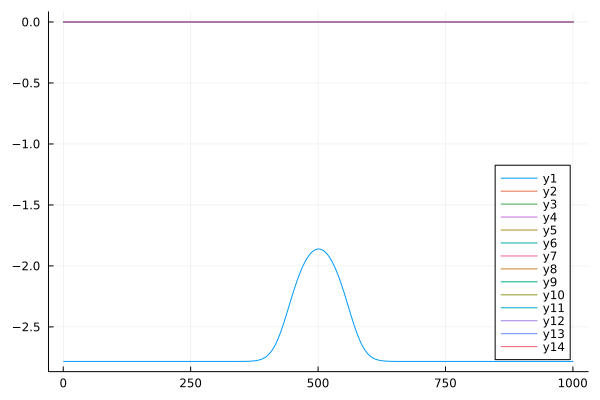

In [7]:
plot(test_sol[:,1,15:end])

In [8]:
include("choques_utils.jl")

wenoz! (generic function with 1 method)

In [9]:
N = 100
M = 1
N_Fields = 14
χ_num = 1.0

test_sol = ones(N,M,2*N_Fields);

Lx = 100.0
Ly = 0.0
lengthpars = (Lx, Ly, N, M)

g_ab_mink = Diagonal([-1.0,1.0,1.0,1.0])
gᵃᵇ_mink = Diagonal([-1.0,1.0,1.0,1.0])

auxvectors = [zeros(4),zeros(4),zeros(4),zeros(4)]
auxmatrices = [zeros(4,4), zeros(4,4), zeros(4,4)]

aux_residual = zeros(14)
aux_jacobian = zeros(14,14)

p_inidat = (χ1_num, χ2_num, g_ab_mink, gᵃᵇ_mink, auxvectors, auxmatrices)

C0 = 10
C1 = 10
C2 = 10

tol = 1e-15
iter_max = 10

par_inidat = (lengthpars, p_inidat)
par_source = (C0, C1, C2, gᵃᵇ_mink, [zeros(4),zeros(4)], [zeros(4,4),zeros(4,4),zeros(4,4)])
par_flux = (χ1_num, χ2_num, g_ab_mink, gᵃᵇ_mink, auxvectors, auxmatrices)
par_inv = (par_flux, tol, iter_max, abs2c_res!, Jabs2c!, aux_residual, aux_jacobian);

hx = N/Lx
hy = 0.0


auxvecs_evolution = []
for i in 1:41
    push!(auxvecs_evolution, zeros(28))
end
auxvecs_evolution = Tuple(auxvecs_evolution)

par_ev = (par_flux, par_source, hx, hy, N, M, N_Fields, Fx!, Fz!, Is!, Speed_max, auxvecs_evolution);


In [11]:
create_initial_data(test_sol, par_inidat)

closing initialization function...


In [13]:
using JLD2
using FileIO

In [14]:
filename = "results/test.jld"

function checktree(dictionary, keylist)
    #recursive dictionary
    indict = dictionary
    for key in keylist
        if key in keys(indict)
            indict = indict[key]
        else
            println("key not in dict, exiting")
            return false
            break
        end
    end
    println("key in dict!")
    return true
end

jldopen(filename, "w") do file
    println("hello")
end

hello


In [15]:
using OrdinaryDiffEq

In [16]:
left = zeros(14)
center = zeros(14)
right = zeros(14)
function evolution!(du,u,par,t)
    #println(u[50,1,1])
    # this is the function that is taken by the time-integrator
    N, M, par_inv, par_ev
    for i in 1:N
        for j in 1:M
            
            convars = @view u[i,j,1:14]
            absvars = @view u[i,j,15:end]

            c2abs!(convars, absvars,par_inv)
        end
    end
    #println("inverted...")
    wenoz!(du, u, par_ev, t)
    return du[:]
end


evolution! (generic function with 1 method)

In [18]:
include("flux-functions.jl")

Speed_max (generic function with 1 method)

In [19]:
testtuple = (zeros(4), zeros(4))

([0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0])

In [20]:
include("auxfunctions.jl")
include("flux-functions.jl")
include("choques_utils.jl")

wenoz! (generic function with 1 method)

In [21]:

println("Starting Euler Run...")

dx = Lx/N
dt = dx*0.1

#=
jldopen(filename, "w") do file
    tf = 1
    
    filenamelist = [string(:wenoz), "chichon", "euler"]
=#  tf = 100.0
    create_initial_data(test_sol, par_inidat)
    println("initialized.")
    
    prob = ODEProblem(evolution!,test_sol,(0.0,tf),(N, M, par_inv, par_ev));
    println("Starting to solve...")
    #solmp5 = solve(prob,SSPRK33(),dt=dt,saveat=0.01*tf);
    sol = solve(prob,SSPRK33(),dt=dt,saveat=0.01*tf);
#=
    println("Solved")
    file_name = ""
    for element in filenamelist
        file_name = file_name*"/"*element
    end
    file[file_name] = sol
    #file["x_array"] = x
    file["dx"] = dx
    file["dt"] = dt
end
=#


Starting Euler Run...
closing initialization function...
initialized.
Starting to solve...


retcode: Success
Interpolation: 1st order linear
t: 101-element Vector{Float64}:
   0.0
   1.0
   2.0
   3.0
   4.0
   5.0
   6.0
   7.0
   8.0
   9.0
   ⋮
  92.0
  93.0
  94.0
  95.0
  96.0
  97.0
  98.0
  99.0
 100.0
u: 101-element Vector{Array{Float64, 3}}:
 [0.10000000000000003; 0.10000000000000003; … ; 0.10000000000000003; 0.10000000000000003;;; 0.0; 0.0; … ; 0.0; 0.0;;; 0.0; 0.0; … ; 0.0; 0.0;;; … ;;; 0.0; 0.0; … ; 0.0; 0.0;;; 0.0; 0.0; … ; 0.0; 0.0;;; 0.0; 0.0; … ; 0.0; 0.0]
 [0.10000000000000003; 0.10000000000000003; … ; 0.10000000000000003; 0.10000000000000003;;; 0.0; 0.0; … ; 0.0; 0.0;;; 0.0; 0.0; … ; 0.0; 0.0;;; … ;;; 0.0; 0.0; … ; 0.0; 0.0;;; 0.0; 0.0; … ; 0.0; 0.0;;; 0.0; 0.0; … ; 0.0; 0.0]
 [0.10000000000000003; 0.10000000000000003; … ; 0.10000000000000003; 0.10000000000000003;;; 0.0; 0.0; … ; 0.0; 0.0;;; 0.0; 0.0; … ; 0.0; 0.0;;; … ;;; 0.0; 0.0; … ; 0.0; 0.0;;; 0.0; 0.0; … ; 0.0; 0.0;;; 0.0; 0.0; … ; 0.0; 0.0]
 [0.10000000000000003; 0.10000000000000003; … ; 0.10000000000

In [22]:
anim = @animate for t in sol.t
    plot(sol(t)[:,1,1])
end

Animation("/tmp/jl_YS2ENY", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000092.png", "000093.png", "000094.png", "000095.png", "000096.png", "000097.png", "000098.png", "000099.png", "000100.png", "000101.png"])

┌ Info: Saved animation to /tmp/jl_6RGvuNGlel.gif
└ @ Plots /home/pablo/.julia/packages/Plots/sxUvK/src/animation.jl:156


Plots.AnimatedGif("/tmp/jl_6RGvuNGlel.gif")
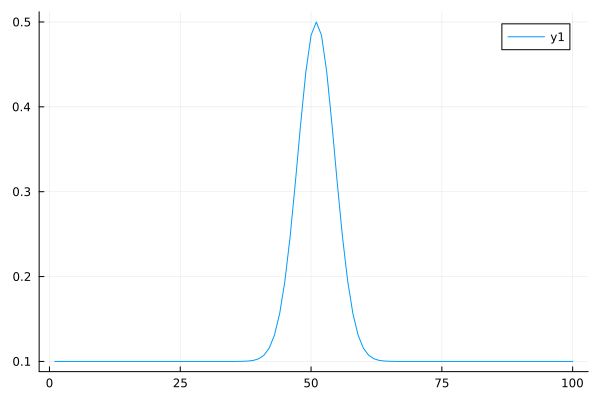

In [23]:
gif(anim)

In [24]:
include("flux-functions.jl")
include("inversion.jl")

c2abs! (generic function with 1 method)

In [25]:
N = 100
M = 1
N_Fields = 14
χ1_num = 1.0
χ2_num = 1.0
test_sol = ones(N,M,2*N_Fields);

Lx = 100.0
Ly = 0.0
lengthpars = (Lx, Ly, N, M)

g_ab_mink = Diagonal([-1.0,1.0,1.0,1.0])
gᵃᵇ_mink = Diagonal([-1.0,1.0,1.0,1.0])

auxvectors = [zeros(4),zeros(4),zeros(4),zeros(4)]
auxmatrices = [zeros(4,4), zeros(4,4), zeros(4,4)]

aux_residual = zeros(14)
aux_jacobian = zeros(14,14)

p_inidat = (χ1_num, χ2_num, g_ab_mink, gᵃᵇ_mink, auxvectors, auxmatrices)

C0 = 10
C1 = 10
C2 = 10

tol = 1e-15
iter_max = 10

par_inidat = (lengthpars, p_inidat)
par_source = (C0, C1, C2, gᵃᵇ_mink, [zeros(4),zeros(4)], [zeros(4,4),zeros(4,4),zeros(4,4)])
par_flux = (χ1_num, χ2_num, g_ab_mink, gᵃᵇ_mink, auxvectors, auxmatrices)
par_inv = (par_flux, tol, iter_max, abs2c_res!, Jabs2c!, aux_residual, aux_jacobian);

hx = N/Lx
hy = 0.0


auxvecs_evolution = []
for i in 1:41
    push!(auxvecs_evolution, zeros(28))
end
auxvecs_evolution = Tuple(auxvecs_evolution)

par_ev = (par_flux, par_source, hx, hy, N, M, N_Fields, Fx!, Fz!, Is!, Speed_max, auxvecs_evolution);

In [26]:
create_initial_data(test_sol, par_inidat)

closing initialization function...


In [27]:
include("inversion.jl")

c2abs! (generic function with 1 method)

In [28]:

println("Starting Dissipative Run...")

dx = Lx/N
dt = dx*0.1

#=
jldopen(filename, "w") do file
    tf = 1
    filenamelist = [string(:wenoz), "chichon", "euler"]
=#  
tf = 50.0

create_initial_data(test_sol, par_inidat)
println("initialized.")

    
prob = ODEProblem(evolution!,test_sol,(0.0,tf),(N, M, par_inv, par_ev));
println("Starting to solve...")
    #solmp5 = solve(prob,SSPRK33(),dt=dt,saveat=0.01*tf);
sol = solve(prob,SSPRK33(),dt=dt,saveat=0.01*tf);
#=
    println("Solved")
    file_name = ""
    for element in filenamelist
        file_name = file_name*"/"*element
    end
    file[file_name] = sol
    #file["x_array"] = x
    file["dx"] = dx
    file["dt"] = dt
end
=#


Starting Dissipative Run...
closing initialization function...
initialized.
Starting to solve...


retcode: Success
Interpolation: 1st order linear
t: 101-element Vector{Float64}:
  0.0
  0.5
  1.0
  1.5
  2.0
  2.5
  3.0
  3.5
  4.0
  4.5
  ⋮
 46.0
 46.5
 47.0
 47.5
 48.0
 48.5
 49.0
 49.5
 50.0
u: 101-element Vector{Array{Float64, 3}}:
 [0.10000000000000003; 0.10000000000000003; … ; 0.10000000000000003; 0.10000000000000003;;; 0.0; 0.0; … ; 0.0; 0.0;;; 0.0; 0.0; … ; 0.0; 0.0;;; … ;;; 0.0; 0.0; … ; 0.0; 0.0;;; 0.0; 0.0; … ; 0.0; 0.0;;; 0.0; 0.0; … ; 0.0; 0.0]
 [0.10000000000000003; 0.10000000000000003; … ; 0.10000000000000003; 0.10000000000000003;;; 0.0; 0.0; … ; 0.0; 0.0;;; 0.0; 0.0; … ; 0.0; 0.0;;; … ;;; 9.349399170560413e-17; 9.349399170560413e-17; … ; 9.349399170560413e-17; 9.349399170560413e-17;;; 0.0; 0.0; … ; 0.0; 0.0;;; 9.349399170560413e-17; 9.349399170560413e-17; … ; 9.349399170560413e-17; 9.349399170560413e-17]
 [0.10000000000000003; 0.10000000000000003; … ; 0.10000000000000003; 0.10000000000000003;;; 0.0; 0.0; … ; 0.0; 0.0;;; 0.0; 0.0; … ; 0.0; 0.0;;; … ;;; 9.34939917056

┌ Info: Saved animation to /tmp/jl_6zC5Qv414R.gif
└ @ Plots /home/pablo/.julia/packages/Plots/sxUvK/src/animation.jl:156


Plots.AnimatedGif("/tmp/jl_6zC5Qv414R.gif")
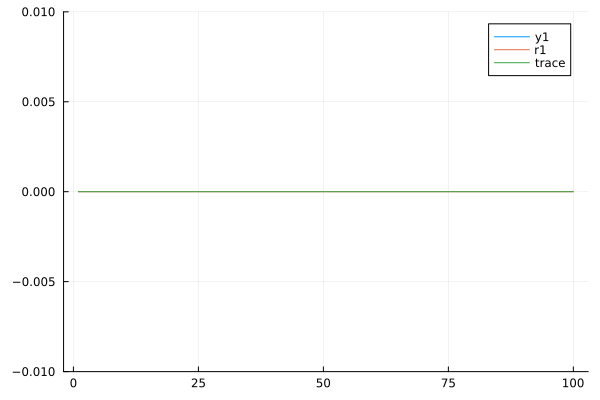

In [29]:
r_num = zeros(4)
tau_num = zeros(4, 4)
r1_values = zeros(N,M)
tau11_values = zeros(N,M)
ν_values = zeros(N,M)
μ_values = zeros(N,M)
ξ_ab_num = zeros(4,4)
ξᵃᵇ_num = zeros(4,4)
ξᵃ_num = zeros(4)
lᵃ_num = zeros(4)
trace_values = zeros(N,M)
anim = @animate for t in sol.t
    plot(sol(t)[:,1,1])
    for i in 1:N
        for j in 1:M

            convars = @view sol(t)[i,j,1:14]    #conservative variables
            absvars = @view sol(t)[i,j,15:end]  #abstract variables

            ξ_a_aux = absvars[1:4]
            ξ_ab_aux = absvars[5:end]

            ξ_ab_fun!(ξ_ab_aux, ξ_ab_num)

            #Vectors
            rise_index!(ξᵃ_num, gᵃᵇ_mink, ξ_a_aux)
            ξᵃᵇ_fun!(ξᵃᵇ_num, gᵃᵇ_mink, ξ_ab_num)
            mul!(lᵃ_num, ξᵃᵇ_num, ξ_a_aux)
            #Scalars
            μ_num = ξᵃ_num'ξ_a_aux
            ν_num = lᵃ_num'ξ_a_aux
        
            #Tensors
            τᵃᵇ_fun!(tau_num, μ_num, ν_num, ξᵃ_num, lᵃ_num, ξᵃᵇ_num, gᵃᵇ_mink)
            r_num = lᵃ_num - ξᵃ_num * ν_num/μ_num

            r1_values[i,j] = r_num[2]
            tau11_values[i,j] = tau_num[2,2]
            μ_values[i,j] = μ_num
            ν_values[i,j] = ν_num
            

            trace_values[i,j] = sum(ξ_ab_num.*gᵃᵇ_mink)

        end
    end
    plot!(ν_values[:,1]./μ_values, label = "r1")
    plot!(trace_values[:,1], label = "trace")
    #plot!(r1_values[:,1], label = "r1")
    #plot!(tau11_values[:,1], label = "tau11")
    ylims!(-0.01, 0.01)

    
end

gif(anim)

In [30]:
iter_max = 40
residual_vec = zeros(iter_max)
convars = copy(sol(0.2)[50,1,1:14])
absvars = copy(sol(0.2)[53,1,15:end])
for it in 1:iter_max
    NR_step!(abs2c_res!, Jabs2c!, aux_jacobian, aux_residual, convars, absvars, par_flux)
    residual_vec[it] = aux_residual'aux_residual;
end

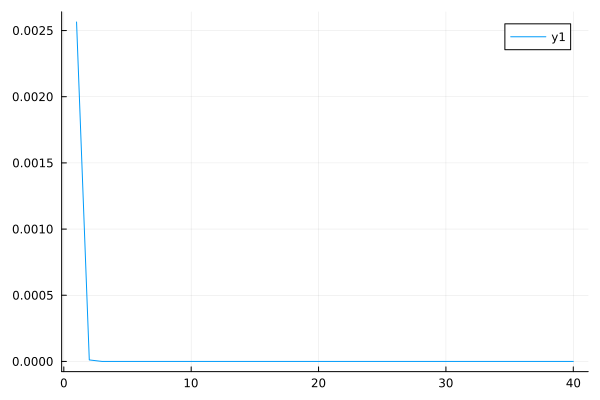

In [31]:
plot(residual_vec)

In [32]:
#Problema: la traza de xiab, y por lo tanto la de Aabc y de Tab, no quedan en 0.